<a href="https://colab.research.google.com/github/Khalidhussainn/Final_Year_Project/blob/main/ML/Suspicious_Login_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SLA/archive_logs_for_SLA.csv")
# df = pd.read_csv(r"G:\My Drive\Colab Notebooks\ML\archive_logs_for_SLA.csv")
df = df.drop(columns=["@timestamp"])


# Data Exploration

## Dataset Description

In [ ]:
df.shape

(12584, 8)

In [ ]:
df.isnull().sum()


,0
data.win.system.eventID,0
agent.name,0
data.win.eventdata.authenticationPackageName,0
data.win.system.processID,0
data.win.system.systemTime,0
data.win.eventdata.logonType,0
data.win.eventdata.logonProcessName,0
data.win.eventdata.targetUserName,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12584 entries, 0 to 12583
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   data.win.system.eventID                       12584 non-null  int64 
 1   agent.name                                    12584 non-null  object
 2   data.win.eventdata.authenticationPackageName  12584 non-null  object
 3   data.win.system.processID                     12584 non-null  int64 
 4   data.win.system.systemTime                    12584 non-null  object
 5   data.win.eventdata.logonType                  12584 non-null  int64 
 6   data.win.eventdata.logonProcessName           12584 non-null  object
 7   data.win.eventdata.targetUserName             12584 non-null  object
dtypes: int64(3), object(5)
memory usage: 786.6+ KB


In [ ]:
unique_values = df.nunique()
print(unique_values)

data.win.system.eventID                             2
agent.name                                         12
data.win.eventdata.authenticationPackageName        3
data.win.system.processID                          35
data.win.system.systemTime                      12191
data.win.eventdata.logonType                        5
data.win.eventdata.logonProcessName                 8
data.win.eventdata.targetUserName                  67
dtype: int64


In [ ]:
df.columns

Index(['data.win.system.eventID', 'agent.name',
       'data.win.eventdata.authenticationPackageName',
       'data.win.system.processID', 'data.win.system.systemTime',
       'data.win.eventdata.logonType', 'data.win.eventdata.logonProcessName',
       'data.win.eventdata.targetUserName'],
      dtype='object')

In [ ]:
df.head()


,data.win.system.eventID,agent.name,data.win.eventdata.authenticationPackageName,data.win.system.processID,data.win.system.systemTime,data.win.eventdata.logonType,data.win.eventdata.logonProcessName,data.win.eventdata.targetUserName
0,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2770369Z,5,Advapi,SYSTEM
1,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2759911Z,5,Advapi,SYSTEM
2,4624,LAB3-10,Negotiate,1032,2025-04-20T11:02:09.4134324Z,5,Advapi,SYSTEM
3,4625,LAB3-11,Negotiate,892,2025-04-20T11:01:10.0486195Z,2,User32,bsit22f.0013
4,4625,LAB3-11,Negotiate,892,2025-04-20T11:00:08.4888022Z,2,User32,bsit22f.0013


In [ ]:
# pip install -U ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport
# p_report = ProfileReport(df)
# p_report.to_file("/content/drive/MyDrive/Colab Notebooks/Report and dataset/report_before_EDA.html")

In [ ]:

duplicate_counts = df.duplicated().sum()
print("Total number of duplicate rows:", duplicate_counts)

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

print("Shape of the DataFrame after removing duplicates:", df_no_duplicates.shape)


Total number of duplicate rows: 393
Shape of the DataFrame after removing duplicates: (12191, 8)


## ploting

> Plot event frequency (Successful vs. Failed Logins)

data.win.system.eventID
4624    11495
4625     1089
Name: count, dtype: int64


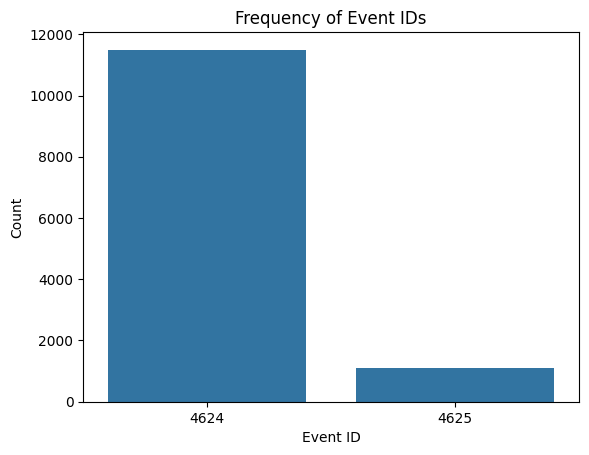

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df["data.win.system.eventID"].value_counts())

sns.countplot(x=df["data.win.system.eventID"])
plt.title("Frequency of Event IDs")
plt.xlabel("Event ID")
plt.ylabel("Count")
plt.show()


data.win.eventdata.logonType
5     10435
3      1408
2       603
11      113
Name: count, dtype: int64


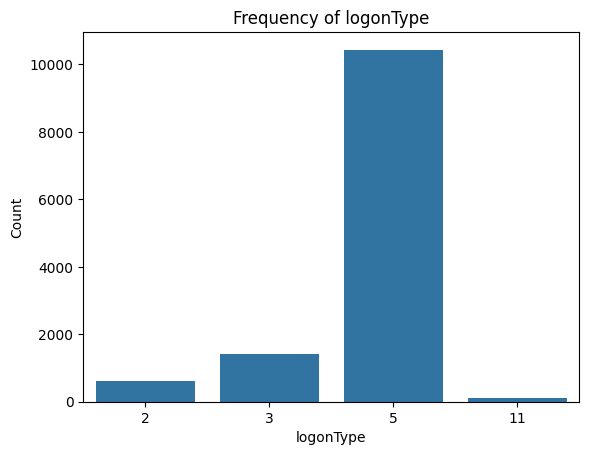

In [ ]:
df = df[df["data.win.eventdata.logonType"].isin([2, 3, 5, 11])]
print(df["data.win.eventdata.logonType"].value_counts())
sns.countplot(x=df['data.win.eventdata.logonType'])
plt.title("Frequency of logonType")
plt.xlabel("logonType")
plt.ylabel("Count")
plt.show()

> Plot rule.level frequency

> Group by eventID and logonType, then count occurrences

<Figure size 1200x600 with 0 Axes>

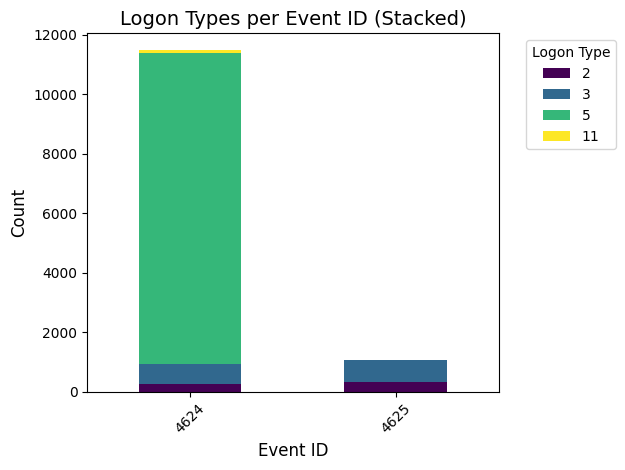

In [ ]:

grouped = df.groupby(['data.win.system.eventID', 'data.win.eventdata.logonType']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', stacked=True, colormap='viridis')

# Customize plot
plt.title("Logon Types per Event ID (Stacked)", fontsize=14)
plt.xlabel("Event ID", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Logon Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> Top Active Agents

In [ ]:
df.head()

,data.win.system.eventID,agent.name,data.win.eventdata.authenticationPackageName,data.win.system.processID,data.win.system.systemTime,data.win.eventdata.logonType,data.win.eventdata.logonProcessName,data.win.eventdata.targetUserName
0,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2770369Z,5,Advapi,SYSTEM
1,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2759911Z,5,Advapi,SYSTEM
2,4624,LAB3-10,Negotiate,1032,2025-04-20T11:02:09.4134324Z,5,Advapi,SYSTEM
3,4625,LAB3-11,Negotiate,892,2025-04-20T11:01:10.0486195Z,2,User32,bsit22f.0013
4,4625,LAB3-11,Negotiate,892,2025-04-20T11:00:08.4888022Z,2,User32,bsit22f.0013


<ipython-input-17-54728f5ee2bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agents.values, y=top_agents.index, palette="magma")


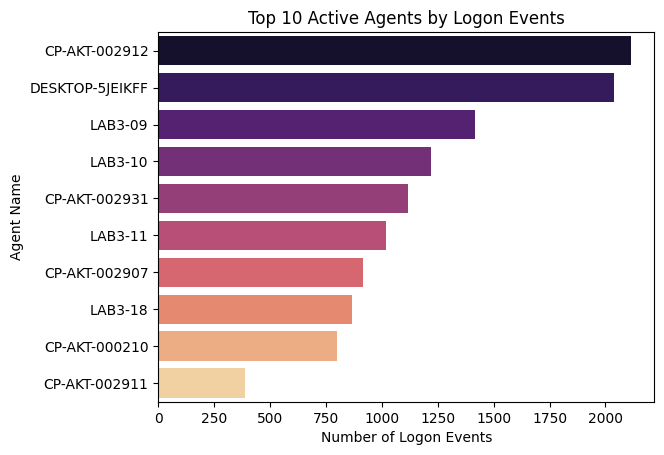

In [ ]:
top_agents = df["agent.name"].value_counts().nlargest(10)
sns.barplot(x=top_agents.values, y=top_agents.index, palette="magma")
plt.title("Top 10 Active Agents by Logon Events")
plt.xlabel("Number of Logon Events")
plt.ylabel("Agent Name")
plt.show()

> IPs with Most Failed Logins

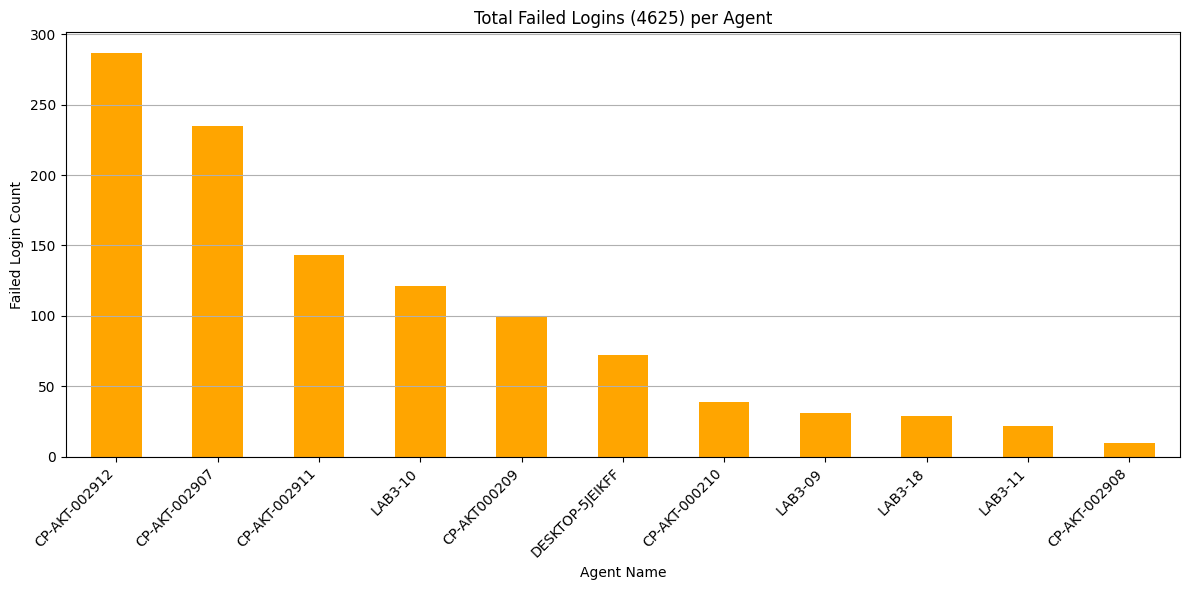

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

event_col = "data.win.system.eventID"
agent_col = "agent.name"

failed_logins_df = df[df[event_col] == 4625]
failed_counts = failed_logins_df[agent_col].value_counts()

plt.figure(figsize=(12, 6))
failed_counts.plot(kind='bar', color='orange')
plt.title('Total Failed Logins (4625) per Agent')
plt.xlabel('Agent Name')
plt.ylabel('Failed Login Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


> Correlation Analysis

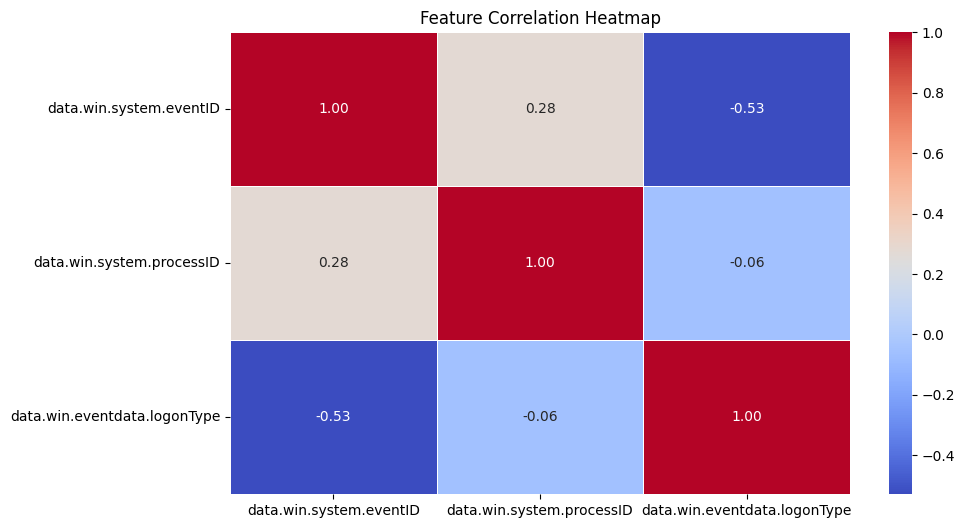

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation only for numeric data
corr_matrix = df_numeric.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

# label_enc = LabelEncoder()

# excluded_cols = ["data.win.system.systemTime"]
# cols_to_encode = [col for col in df.select_dtypes(include=['object']).columns if col not in excluded_cols]


# for col in cols_to_encode:
#     df[col] = label_enc.fit_transform(df[col])

# corr_matrix = df.corr(numeric_only=True)

# plt.figure(figsize=(10, 4))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Feature Correlation Heatmap (Encoded Data)")
# plt.show()


# Data Preprocessing & Cleaning

## Handle Missing Values

In [ ]:
df.head()

,data.win.system.eventID,agent.name,data.win.eventdata.authenticationPackageName,data.win.system.processID,data.win.system.systemTime,data.win.eventdata.logonType,data.win.eventdata.logonProcessName,data.win.eventdata.targetUserName
0,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2770369Z,5,Advapi,SYSTEM
1,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2759911Z,5,Advapi,SYSTEM
2,4624,LAB3-10,Negotiate,1032,2025-04-20T11:02:09.4134324Z,5,Advapi,SYSTEM
3,4625,LAB3-11,Negotiate,892,2025-04-20T11:01:10.0486195Z,2,User32,bsit22f.0013
4,4625,LAB3-11,Negotiate,892,2025-04-20T11:00:08.4888022Z,2,User32,bsit22f.0013


> Replace '-' with NaN in the entire dataset and Fill missing values

In [ ]:

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


print("Missing values after handling:\n", df.isnull().sum())


Missing values after handling:
 data.win.system.eventID                         0
agent.name                                      0
data.win.eventdata.authenticationPackageName    0
data.win.system.processID                       0
data.win.system.systemTime                      0
data.win.eventdata.logonType                    0
data.win.eventdata.logonProcessName             0
data.win.eventdata.targetUserName               0
dtype: int64


## Convert Categorical to Numeric

In [ ]:
df.head()

,data.win.system.eventID,agent.name,data.win.eventdata.authenticationPackageName,data.win.system.processID,data.win.system.systemTime,data.win.eventdata.logonType,data.win.eventdata.logonProcessName,data.win.eventdata.targetUserName
0,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2770369Z,5,Advapi,SYSTEM
1,4624,LAB3-09,Negotiate,1072,2025-04-20T11:02:14.2759911Z,5,Advapi,SYSTEM
2,4624,LAB3-10,Negotiate,1032,2025-04-20T11:02:09.4134324Z,5,Advapi,SYSTEM
3,4625,LAB3-11,Negotiate,892,2025-04-20T11:01:10.0486195Z,2,User32,bsit22f.0013
4,4625,LAB3-11,Negotiate,892,2025-04-20T11:00:08.4888022Z,2,User32,bsit22f.0013


> Converting data.win.system.systemTime to datetime format.

In [ ]:
df["data.win.system.systemTime"] = pd.to_datetime(df["data.win.system.systemTime"])

df["year"] = df["data.win.system.systemTime"].dt.year
df["month"] = df["data.win.system.systemTime"].dt.month
df["day"] = df["data.win.system.systemTime"].dt.day
df["hour"] = df["data.win.system.systemTime"].dt.hour
df["minute"] = df["data.win.system.systemTime"].dt.minute
df["second"] = df["data.win.system.systemTime"].dt.second
df["day_of_week"] = df["data.win.system.systemTime"].dt.weekday

df = df.drop(columns=["data.win.system.systemTime"])


In [ ]:
df.head()

,data.win.system.eventID,agent.name,data.win.eventdata.authenticationPackageName,data.win.system.processID,data.win.eventdata.logonType,data.win.eventdata.logonProcessName,data.win.eventdata.targetUserName,year,month,day,hour,minute,second,day_of_week
0,4624,LAB3-09,Negotiate,1072,5,Advapi,SYSTEM,2025,4,20,11,2,14,6
1,4624,LAB3-09,Negotiate,1072,5,Advapi,SYSTEM,2025,4,20,11,2,14,6
2,4624,LAB3-10,Negotiate,1032,5,Advapi,SYSTEM,2025,4,20,11,2,9,6
3,4625,LAB3-11,Negotiate,892,2,User32,bsit22f.0013,2025,4,20,11,1,10,6
4,4625,LAB3-11,Negotiate,892,2,User32,bsit22f.0013,2025,4,20,11,0,8,6


> Apply Hash Encoding

In [ ]:
unique_values = df.nunique()
print(unique_values)

data.win.system.eventID                          2
agent.name                                      12
data.win.eventdata.authenticationPackageName     3
data.win.system.processID                       35
data.win.eventdata.logonType                     4
data.win.eventdata.logonProcessName              7
data.win.eventdata.targetUserName               67
year                                             1
month                                            2
day                                             20
hour                                            24
minute                                          60
second                                          60
day_of_week                                      7
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for selected categorical columns
label_cols = [
    "agent.name",
    "data.win.eventdata.authenticationPackageName",
    "data.win.eventdata.logonType",
    "data.win.eventdata.logonProcessName",
    "data.win.eventdata.targetUserName",
    "data.win.system.processID"

]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Binary Encoding for eventID (only 2 values like 4624 and maybe 4634)
df["data.win.system.eventID"] = df["data.win.system.eventID"].map(lambda x: 1 if x == 4624 else 0)


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12559 entries, 0 to 12583
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   data.win.system.eventID                       12559 non-null  int64
 1   agent.name                                    12559 non-null  int64
 2   data.win.eventdata.authenticationPackageName  12559 non-null  int64
 3   data.win.system.processID                     12559 non-null  int64
 4   data.win.eventdata.logonType                  12559 non-null  int64
 5   data.win.eventdata.logonProcessName           12559 non-null  int64
 6   data.win.eventdata.targetUserName             12559 non-null  int64
 7   year                                          12559 non-null  int32
 8   month                                         12559 non-null  int32
 9   day                                           12559 non-null  int32
 10  hour           

In [ ]:
df.head()

,data.win.system.eventID,agent.name,data.win.eventdata.authenticationPackageName,data.win.system.processID,data.win.eventdata.logonType,data.win.eventdata.logonProcessName,data.win.eventdata.targetUserName,year,month,day,hour,minute,second,day_of_week
0,1,8,2,21,2,0,33,2025,4,20,11,2,14,6
1,1,8,2,21,2,0,33,2025,4,20,11,2,14,6
2,1,9,2,11,2,0,33,2025,4,20,11,2,9,6
3,0,10,2,3,0,5,51,2025,4,20,11,1,10,6
4,0,10,2,3,0,5,51,2025,4,20,11,0,8,6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

df = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
print(pd.DataFrame(X_scaled).head())  # Ensures mean is ~0 and std is ~1

         0         1         2         3         4         5         6    7   \
0  0.308129  0.634962  0.332709  0.345076  0.380782 -0.423187  0.233510  0.0   
1  0.308129  0.634962  0.332709  0.345076  0.380782 -0.423187  0.233510  0.0   
2  0.308129  0.950570  0.332709 -0.870444  0.380782 -0.423187  0.233510  0.0   
3 -3.245397  1.266179  0.332709 -1.842860 -3.443477  2.908564  2.220323  0.0   
4 -3.245397  1.266179  0.332709 -1.842860 -3.443477  2.908564  2.220323  0.0   

         8         9         10        11        12        13  
0  0.748285  0.322164  0.206867 -1.540322 -0.925172  1.331294  
1  0.748285  0.322164  0.206867 -1.540322 -0.925172  1.331294  
2  0.748285  0.322164  0.206867 -1.540322 -1.214034  1.331294  
3  0.748285  0.322164  0.206867 -1.596998 -1.156262  1.331294  
4  0.748285  0.322164  0.206867 -1.653674 -1.271806  1.331294  


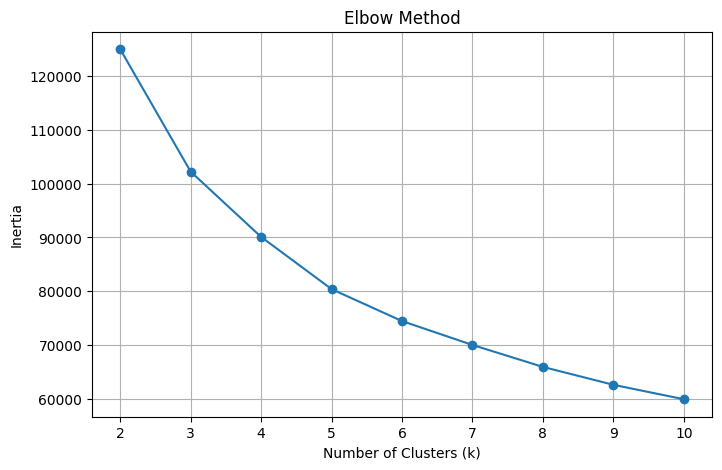

In [ ]:
# K-means Clustering + Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
# Cluster-wise average of each feature
cluster_profile = df.groupby("Cluster").mean()
print(cluster_profile)


         data.win.system.eventID  agent.name  \
Cluster                                        
0                       0.997643    6.057515   
1                       0.455197    5.611367   

         data.win.eventdata.authenticationPackageName  \
Cluster                                                 
0                                            2.000000   
1                                            0.993344   

         data.win.system.processID  data.win.eventdata.logonType  \
Cluster                                                            
0                        17.689233                      1.999717   
1                        20.723502                      0.720942   

         data.win.eventdata.logonProcessName  \
Cluster                                        
0                                   0.039035   
1                                   3.871992   

         data.win.eventdata.targetUserName    year     month        day  \
Cluster                              

In [ ]:
print(df["Cluster"].value_counts())


Cluster
0    10606
1     1953
Name: count, dtype: int64


In [ ]:
# Step 2: Evaluate with Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.40


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.403
k=3, Silhouette Score=0.246
k=4, Silhouette Score=0.268
k=5, Silhouette Score=0.288
k=6, Silhouette Score=0.218
k=7, Silhouette Score=0.196
k=8, Silhouette Score=0.200
k=9, Silhouette Score=0.208
k=10, Silhouette Score=0.210


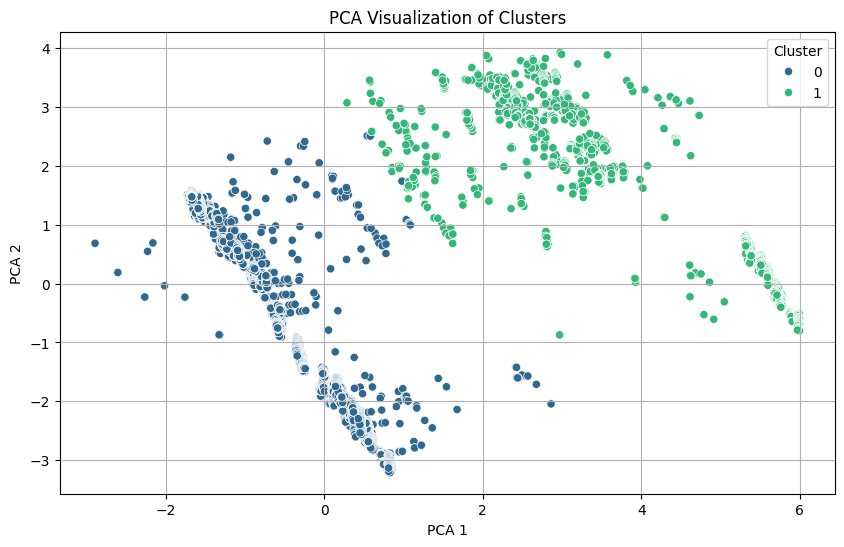

In [ ]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

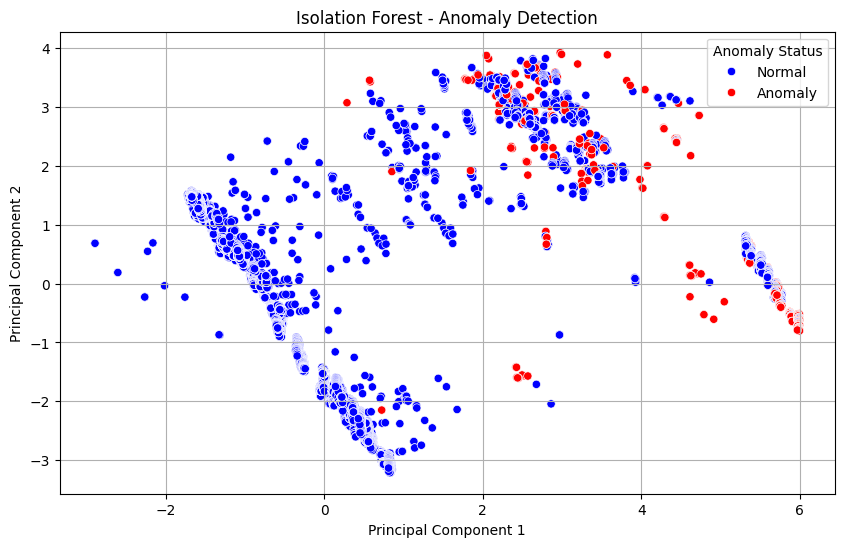

Number of detected anomalies: 627


In [ ]:
# Apply Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Map results
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Scatter Plot of Anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Anomaly'], palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Isolation Forest - Anomaly Detection")
plt.legend(title="Anomaly Status")
plt.grid(True)
plt.show()

# Print anomaly count
print("Number of detected anomalies:", df[df['Anomaly'] == 'Anomaly'].shape[0])

Anomaly
 1    11943
-1      616
Name: count, dtype: int64


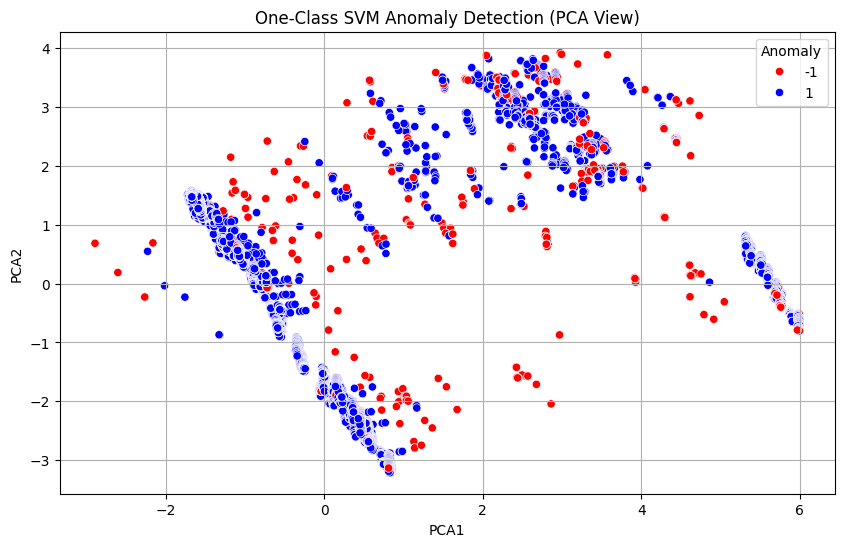

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Train One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
ocsvm.fit(X_scaled)
preds = ocsvm.predict(X_scaled)

# -1 = anomaly, 1 = normal
df['Anomaly'] = preds


print(df['Anomaly'].value_counts())

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title('One-Class SVM Anomaly Detection (PCA View)')
plt.legend(title='Anomaly')
plt.grid(True)
plt.show()

In [ ]:

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_IF_raw'] = iso_forest.fit_predict(X_scaled)
df['Anomaly_IF'] = df['Anomaly_IF_raw'].map({1: 'Normal', -1: 'Anomaly'})


ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
df['Anomaly_SVM_raw'] = ocsvm.fit_predict(X_scaled)
df['Anomaly_SVM_mapped'] = df['Anomaly_SVM_raw'].map({1: 'Normal', -1: 'Anomaly'})

df['Both_Models'] = df.apply(
    lambda row: 'Both Anomaly' if row['Anomaly_IF'] == 'Anomaly' and row['Anomaly_SVM_mapped'] == 'Anomaly' else 'Other',
    axis=1
)

print("Isolation Forest Anomalies:", (df['Anomaly_IF'] == 'Anomaly').sum())
print("One-Class SVM Anomalies:", (df['Anomaly_SVM_mapped'] == 'Anomaly').sum())
print("Agreed Anomalies (Both Models):", (df['Both_Models'] == 'Both Anomaly').sum())


Isolation Forest Anomalies: 627
One-Class SVM Anomalies: 616
Agreed Anomalies (Both Models): 210


Exported agreed anomalies.


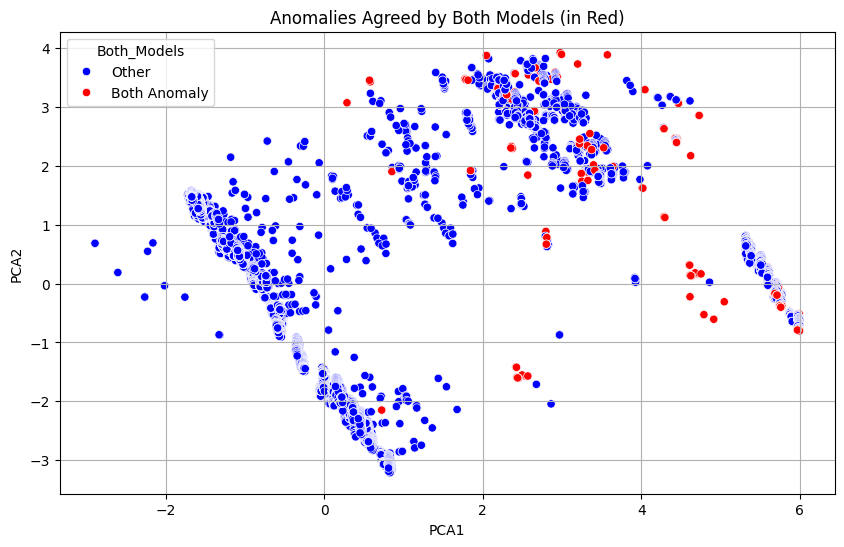

In [ ]:
agreed_anomalies = df[df['Both_Models'] == 'Both Anomaly']
agreed_anomalies.to_csv("agreed_anomalies.csv", index=False)
print("Exported agreed anomalies.")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Both_Models', palette={'Both Anomaly': 'red', 'Other': 'blue'})
plt.title('Anomalies Agreed by Both Models (in Red)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, mean_squared_error



y_true = df['Anomaly_IF_raw']
y_pred = df['Anomaly_SVM_raw']

# Calculate ROC-AUC score
try:
    roc_auc = roc_auc_score(y_true, y_pred)
    print("===== ROC-AUC Score =====")
    print(f"ROC-AUC: {roc_auc:.4f}")
except ValueError as e:
    print(f"ROC-AUC calculation error: {e}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("\n===== Mean Squared Error =====")
print(f"MSE: {mse:.4f}")


===== ROC-AUC Score =====
ROC-AUC: 0.6505

===== Mean Squared Error =====
MSE: 0.2621


In [ ]:
from google.colab import files
import joblib

label_encoders = {}

# Save LabelEncoders
for col in label_cols:
    # Create a new LabelEncoder for each column
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    joblib.dump(label_encoders[col], f'/content/label_encoder_{col.replace(".", "_")}.joblib')
    files.download(f'/content/label_encoder_{col.replace(".", "_")}.joblib')

# Save StandardScaler
joblib.dump(scaler, '/content/standard_scaler.joblib')
files.download('/content/standard_scaler.joblib')

# Save Isolation Forest
joblib.dump(iso_forest, '/content/isolation_forest.joblib')
files.download('/content/isolation_forest.joblib')

# Save PCA
joblib.dump(pca, '/content/pca_model.joblib')
files.download('/content/pca_model.joblib')

# Save Plot
plt.savefig('/content/anomaly_plot.png')
files.download('/content/anomaly_plot.png')

# Save Processed DataFrame
df.to_csv('/content/processed_data.csv', index=False)
files.download('/content/processed_data.csv')